In [3]:
import numpy as np
import os

import PIL as pl

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = (14,10)

In [2]:
# Where the images are stored

raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

In [5]:
cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

In [7]:
from PIL import Image


test_img = Image.open( raw_dir+cup_dir+cup_image_name_list[0] )

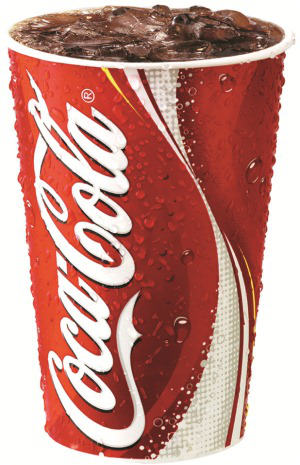

In [12]:
test_img

In [9]:
print test_img.format, test_img.size, test_img.mode

JPEG (300, 465) RGB


In [10]:
r,g,b = test_img.split()

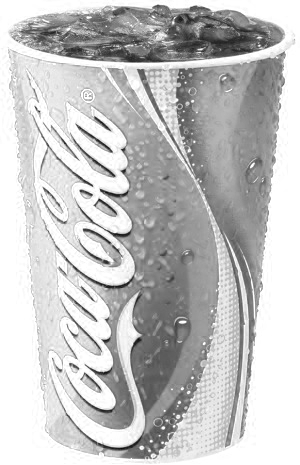

In [11]:
r

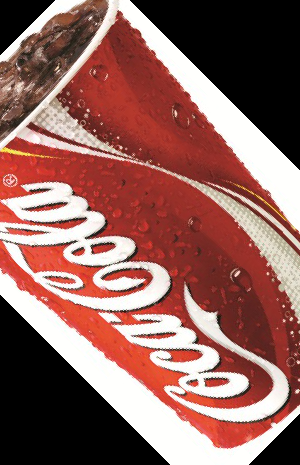

In [14]:
test_img.rotate(45)

In [27]:
foo = np.array(test_img.getdata())
pix_r = foo[:,0].reshape( test_img.size )
pix_g = foo[:,1].reshape( test_img.size )
pix_b = foo[:,2].reshape( test_img.size )

In [28]:
#  large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP

In [34]:
basewidth = 500

wpercent = (basewidth/float(test_img.size[0]))

hsize = int((float(test_img.size[1])*float(wpercent)))

resized_img = test_img.resize((basewidth,hsize), Image.ANTIALIAS)

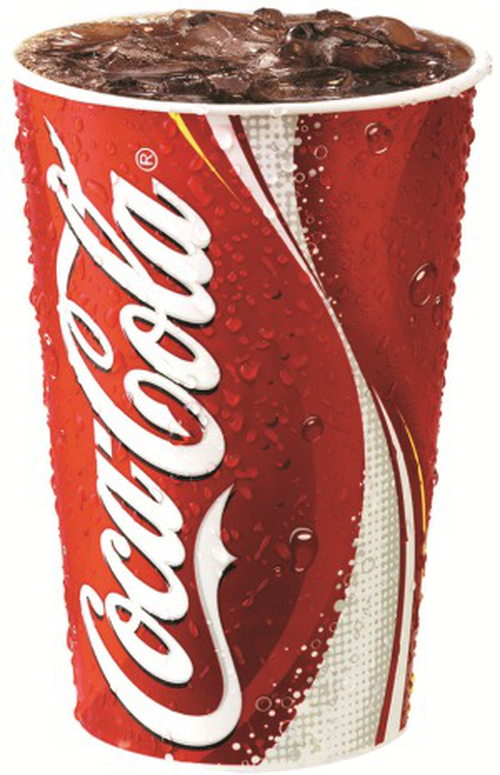

In [35]:
resized_img

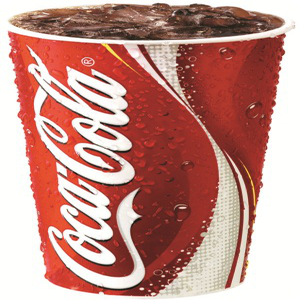

In [37]:
test_img.resize((300,300), Image.ANTIALIAS)

In [ ]:
# Do pooling
def pool_arr( inp_arr, grid_size=2, stride=2, kind='max' ):
    
    # Must be max, min, or avg
    kind = kind.lower()
    assert ( 
             kind == 'max' or
             kind == 'min' or
             kind == 'avg' or
             kind == 'med'
           ), 'kind must be max, min, med, or avg'
    # Operation
    o_dict = {'max':np.max,'min':np.min,'avg':np.average,'med',np.median}
    
    # Get the size of the square image, force it to be a square
#######################################################################################
#######################################################################################
    
    pix_0     = int( np.sqrt(vals_df.shape[1] )
    assert abs( pix - np.sqrt(vals_df.shape[1]) ) < 1e-4, 'Input df is not a square image'
    
    # Find resultant image size, save original size
    new_pix = pix//stride
    pix_orig = inp_df.shape[1]-1
    
    ret_df = pd.DataFrame()
    
    # Loop over df rows, and reshape into a square image
    # Then perform pooling, and reshape to a df
    for row in range(0,vals_df.shape[0]):
    
        # Get the image values and reshape to 2d
        row_lab  = labs.loc[row]['label']

    
        # Turn into square image
        img = vals_df.loc[row].values.reshape( (pix,pix) )
        

        # Create new output image
        new_img = np.zeros( [new_pix,
                             new_pix] )
        
        
        # Loop over and do the pass
        for     i in range( 0, new_pix ):
            for j in range( 0, new_pix ):
                
                
                new_img[i,j] = o_dict[kind]( 
                                                img[ 
                                                    i*grid_size:(i+1)*grid_size,
                                                    j*grid_size:(j+1)*grid_size
                                                   ] 
                                           )
        
        # First time, make the return df
        if ( row == 0 ):
            ret_df['label'] = inp_df['label'].values
            ret_df = ret_df.reindex( columns=ret_df.columns.tolist() + ['pix_'+str(x) for x in range(0,new_pix*new_pix)] )
#            ret_df = ret_df.reindex( columns= ['pix_'+str(x) for x in range(0,new_pix*new_pix)] )

            
        # Fill in the pixels and label
        ret_df.loc[ row ] = np.append( np.array([row_lab]), new_img.reshape(1,-1) )

    
    return ret_df


In [38]:
force_height = 400
force_width  = force_height

raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

raw_img = Image.open( raw_dir+cup_dir+cup_image_name_list[0] )

First thing to do is read in values, resize so workable, and break into channels. Forced size will be 400x400

In [45]:
resized_img = raw_img.resize((force_width,force_height),Image.ANTIALIAS)

Next, blur the image

In [61]:
from PIL import ImageFilter

# Do 5x5 kernel blurring
blurred_img = resized_img.filter( ImageFilter.Kernel( [5,5], np.ones(25) ) )

Try pooling to resize

In [76]:
pooled_img_3 = blurred_img.filter( ImageFilter.MaxFilter(3) )
pooled_img_media = blurred_img.filter( ImageFilter.MedianFilter(5) )

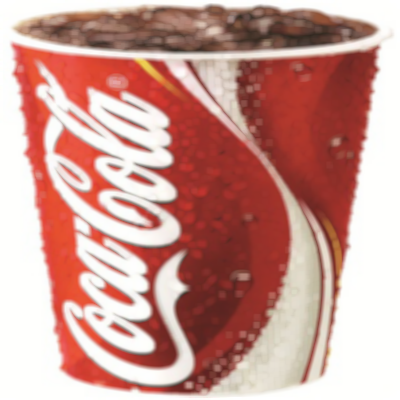

In [68]:
pooled_img_3

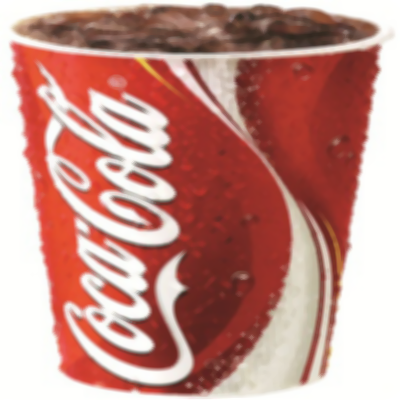

In [77]:
pooled_img_media

Break into channels

In [63]:
img_val_arr = np.array( blurred_img.getdata() )
pix_shape   = blurred_img.size
r_pix = img_val_arr[:,0].reshape( pix_shape )
g_pix = img_val_arr[:,1].reshape( pix_shape )
b_pix = img_val_arr[:,2].reshape( pix_shape )

In [49]:
import PIL
PIL.version.__version__

AttributeError: 'module' object has no attribute 'version'